In [8]:
from pymongo import MongoClient # Install for using this lib.
import subprocess

In [2]:
dbname = 'msan697'
collection_name1 = 'reviews'
collection_name2 = 'business'
collection_name3 = 'users'

path = "/Users/Shikhar/Downloads/dataset/"

input_file_name1 = path+"review.json"
input_file_name2 = path+'business.json'
input_file_name3 = path+'user.json'

In [4]:
def import_query(dbname, collection_name, input_file_name):
    mongoimport_query =  'mongoimport --db ' + dbname + ' --collection ' + collection_name + ' --file ' + input_file_name
    #COMPLETE THIS.
    return mongoimport_query
 
#Create connection 
client = MongoClient() #default-localhost:27017
#Connect to database
db = client[dbname]

In [4]:
#Drop table.
db[collection_name1].drop()
db[collection_name2].drop()
db[collection_name3].drop()

#Insert all data from the input_file_name.

In [5]:
mongoimport_query = import_query(dbname, collection_name1, input_file_name1)
subprocess.call(mongoimport_query,shell=True)

mongoimport_query = import_query(dbname, collection_name2, input_file_name2)
subprocess.call(mongoimport_query,shell=True)

mongoimport_query = import_query(dbname, collection_name3, input_file_name3)
subprocess.call(mongoimport_query,shell=True)

0

### Getting business with review counts greater than 100

In [17]:
restaurants = db.business.find({ '$or' : [ { "attributes.RestaurantsReservations" : {'$exists' : 'true'} }, { "attributes.RestaurantsDelivery" : {'$exists':'true'}}, 
                            { "attributes.RestaurantsAttire" : {'$exists':'true'}}, { "attributes.RestaurantsCounterService" : {'$exists':'true'}}, 
                            { "attributes.RestaurantsGoodForGroups" : {'$exists':'true'}}, { "attributes.RestaurantsPriceRange2" : {'$exists':'true'}}, 
                            { "attributes.RestaurantsTableService" : {'$exists':'true'}}, { "attributes.RestaurantsTakeOut" : {'$exists':'true'}}, 
                            { "attributes.GoodForMeal" : {'$exists':'true'}}], 
                    "review_count":{"$gt": 25}})

In [18]:
rest_data = list(restaurants)

In [19]:
rest_data

[{u'_id': ObjectId('5a5bdcfc5b574b5f7e2b7bc3'),
  u'address': u'2017 E Camelback Rd',
  u'attributes': {u'BikeParking': True,
   u'BusinessAcceptsCreditCards': True,
   u'BusinessParking': {u'garage': False,
    u'lot': True,
    u'street': False,
    u'valet': False,
    u'validated': False},
   u'RestaurantsPriceRange2': 2},
  u'business_id': u'uUEMrhJiL1a1pCA_I1SU7Q',
  u'categories': [u'Shopping', u'Tobacco Shops'],
  u'city': u'Phoenix',
  u'hours': {u'Friday': u'10:00-21:00',
   u'Monday': u'10:00-20:00',
   u'Saturday': u'10:00-21:00',
   u'Sunday': u'10:00-19:00',
   u'Thursday': u'10:00-20:00',
   u'Tuesday': u'10:00-20:00',
   u'Wednesday': u'10:00-20:00'},
  u'is_open': 0,
  u'latitude': 33.5080678,
  u'longitude': -112.0375524,
  u'name': u"Baxter's Cigars",
  u'neighborhood': u'',
  u'postal_code': u'85016',
  u'review_count': 35,
  u'stars': 5.0,
  u'state': u'AZ'},
 {u'_id': ObjectId('5a5bdcfc5b574b5f7e2b7bce'),
  u'address': u'3710 Payne Ave',
  u'attributes': {u'BikePa

In [20]:
# Collecting business ID's
business_ids = []
for i in range(len(list(rest_data))):
    business_ids.append(rest_data[i]['business_id'])

### Filter users having review count greater than 50

In [24]:
filtered_users = db.users.find({"review_count":{"$gt": 50}})

In [25]:
user = list(filtered_users)

In [26]:
user_ids = []
for i in range(len(user)):
    user_ids.append(user[i]['user_id'])

In [27]:
len(user)

112146

### Filter reviews based on filtered users and business

In [28]:
filtered_reviews = db.reviews.find({"user_id": {'$in':user_ids}, "business_id": {'$in':business_ids}})

In [29]:
db.filtered_reviews.drop()
result = db.filtered_reviews.insert_many(filtered_reviews)

---



### Loading data from mongodb into pyspark

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [56]:
reviews = spark.read.format("com.mongodb.spark.sql.DefaultSource").option("uri","mongodb://127.0.0.1/msan697.filtered_reviews").load()

In [6]:
business = spark.read.format("com.mongodb.spark.sql.DefaultSource").option("uri","mongodb://127.0.0.1/msan697.business").load()

NameError: name 'spark' is not defined

In [7]:
users = spark.read.format("com.mongodb.spark.sql.DefaultSource").option("uri","mongodb://127.0.0.1/msan697.users").load()

NameError: name 'spark' is not defined

In [7]:
business.select('business_id','attributes','review_count','stars').show()

+--------------------+--------------------+------------+-----+
|         business_id|          attributes|review_count|stars|
+--------------------+--------------------+------------+-----+
|CVtCbSB1zUcUWg-9T...|[null,null,null,n...|           3|  3.0|
|YDf95gJZaq05wvo7h...|[null,null,null,n...|          17|  2.0|
|v2WhjAB3PIBA8J8Vx...|[null,null,null,n...|           7|  4.5|
|mLwM-h2YhXl2NCgdS...|[null,null,[false...|           4|  4.5|
|duHFBe87uNSXImQmv...|[null,none,[false...|          10|  4.5|
|uUEMrhJiL1a1pCA_I...|[null,null,null,n...|          35|  5.0|
|kFtuYklkAIlmYw8RZ...|[null,null,null,n...|           7|  5.0|
|NqiQdFa93wzUJGo29...|[true,null,null,n...|           8|  5.0|
|fEylCY3UEH8YJ0Xa7...|[null,null,null,n...|          16|  2.5|
|2eJEUJIP54tex7T9Y...|[true,null,null,n...|          19|  5.0|
|N9BN9ldVl1FNzcB9_...|[null,null,null,n...|          13|  4.5|
|6s3z3TlpHOIecuSyP...|[null,null,null,n...|           7|  4.5|
|n33Izvzk_z9_51H6N...|[null,null,null,n...|          21

In [44]:
users.select('average_stars','fans','review_count','user_id','yelping_since').show()

+-------------+----+------------+--------------------+-------------+
|average_stars|fans|review_count|             user_id|yelping_since|
+-------------+----+------------+--------------------+-------------+
|          3.8| 209|         272|lsSiIjAKVl-QRxKjR...|   2010-07-13|
|         3.76|  11|         436|D-ydMTPGWXTVm4_jj...|   2013-04-01|
|         4.72|  17|         277|-lGwMGHMC_XihFJNK...|   2014-10-31|
|          4.4|  17|          91|N2arP_u4sMGLgOZhA...|   2013-12-20|
|         4.06|   5|          68|YHJIMK_zVH_VY6HCY...|   2012-06-08|
|         3.63|   3|         184|g3V76Ja0XgWS1rqx0...|   2007-09-11|
|         4.19|   5|          48|VTL4Dep5p7XrrOtgn...|   2010-04-25|
|          5.0|   1|          22|uXjR2GhCAYhqxVr21...|   2011-10-14|
|         4.23|  49|         921|PcvbBOCOcs6_suRDH...|   2012-08-16|
|         3.91|   6|         375|gGdg9LOh61iUX1ui6...|   2013-11-25|
|         3.87|  33|         100|UUVbV8XmTzNksBOPa...|   2012-02-22|
|         3.54|   8|          73|u

#### Business

In [8]:
df_b = business.select('business_id','review_count','stars').toPandas()

In [48]:
df_b.shape #156k restaraunt businesses

(156639, 3)

In [35]:
np.max(df_b['review_count'])

6979

In [36]:
np.median(df_b['review_count'])

9.0

In [37]:
np.mean(df_b['review_count'])

30.23815907915653

In [40]:
np.sum(df_b['review_count']) #47 lakh reviews

4736475L

In [42]:
np.sum(df_b[df_b['review_count']>200]['review_count'])

1639004L

(array([ 116379.,   17237.,    7131.,    4177.,    2548.,    1866.,
           1267.,     906.,     797.,     593.]),
 array([   3. ,   22.6,   42.2,   61.8,   81.4,  101. ,  120.6,  140.2,
         159.8,  179.4,  199. ]),
 <a list of 10 Patch objects>)

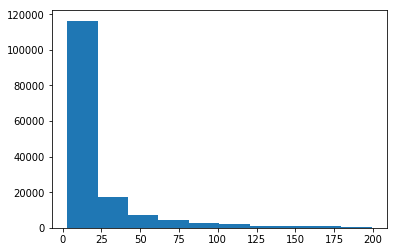

In [39]:
plt.hist(df_b[df_b['review_count']<200]['review_count'])

#### Users

In [45]:
df_u = users.select('average_stars','fans','review_count','user_id','yelping_since').toPandas()

In [47]:
df_u.shape #1.1 million users

(1183362, 5)

In [49]:
df_u.head()

,average_stars,fans,review_count,user_id,yelping_since
0,3.80,209,272,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.76,11,436,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01
2,4.72,17,277,-lGwMGHMC_XihFJNKCJNRg,2014-10-31
3,4.40,17,91,N2arP_u4sMGLgOZhA6ZFoQ,2013-12-20
4,4.06,5,68,YHJIMK_zVH_VY6HCY6bYvg,2012-06-08


In [50]:
np.max(df_u.yelping_since)

u'2017-07-26'

In [51]:
np.min(df_u.yelping_since)

u'2004-10-12'

(array([ 1003378.,    83713.,    31535.,    17175.,    10844.,     7569.,
            5464.,     4087.,     3171.,     2475.]),
 array([   0. ,   29.9,   59.8,   89.7,  119.6,  149.5,  179.4,  209.3,
         239.2,  269.1,  299. ]),
 <a list of 10 Patch objects>)

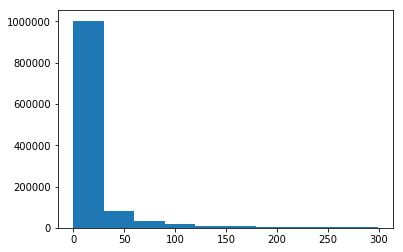

In [55]:
plt.hist(df_u[df_u['review_count']<300]['review_count'])

#### Reviews

In [57]:
reviews.show()

+--------------------+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+
|                 _id|         business_id|cool|      date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+
|[5a5bdc235b574b5f...|jQsNFOzDpxPmOurSW...|   0|2015-03-26|    0|i5UwUPlQFPLcE8p2g...|    4|For being fairly ...|     1|WZXp9-V2dqRRJqhGg...|
|[5a5bdc235b574b5f...|jQsNFOzDpxPmOurSW...|   1|2012-12-30|    1|EyQyvTTg2jX4or9bB...|    5|I decided to try ...|     2|XylT12exfdLiI_3uD...|
|[5a5bdc235b574b5f...|jQsNFOzDpxPmOurSW...|   0|2015-07-11|    0|6PcJSGUBSLjt4VLXo...|    3|Sometimes the foo...|     0|TLIWzAJPrET0zX4_v...|
|[5a5bdc235b574b5f...|jQsNFOzDpxPmOurSW...|   1|2009-01-12|    1|G-EFA005besj5uHsH...|    3|I'm not saying Pe...|     1|Ji9PeffxjwqPLO7pE...|
|[5a5b

In [58]:
reviews.count() #1.2 million reviews

1269069

In [59]:
reviews.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- cool: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: integer (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: integer (nullable = true)
 |-- user_id: string (nullable = true)



In [63]:
reviews_filter = reviews.select('business_id','review_id','stars','text','user_id')

In [64]:
reviews_filter.show()

+--------------------+--------------------+-----+--------------------+--------------------+
|         business_id|           review_id|stars|                text|             user_id|
+--------------------+--------------------+-----+--------------------+--------------------+
|jQsNFOzDpxPmOurSW...|i5UwUPlQFPLcE8p2g...|    4|For being fairly ...|WZXp9-V2dqRRJqhGg...|
|jQsNFOzDpxPmOurSW...|EyQyvTTg2jX4or9bB...|    5|I decided to try ...|XylT12exfdLiI_3uD...|
|jQsNFOzDpxPmOurSW...|6PcJSGUBSLjt4VLXo...|    3|Sometimes the foo...|TLIWzAJPrET0zX4_v...|
|jQsNFOzDpxPmOurSW...|G-EFA005besj5uHsH...|    3|I'm not saying Pe...|Ji9PeffxjwqPLO7pE...|
|jQsNFOzDpxPmOurSW...|GiEB_A-m9HuX521WQ...|    4|1st! Place is not...|UG4EKu13JRwzRix6E...|
|jQsNFOzDpxPmOurSW...|OrhWg2MmCznwfKfjH...|    3|Pretty good, not ...|1YorWW0Z-YDuYC5Gp...|
|jQsNFOzDpxPmOurSW...|ai6O4UqqDqnjO7gfz...|    3|1st visit had the...|R6vb0FtmClhfwajs_...|
|jQsNFOzDpxPmOurSW...|ukpjwnetF5wGhGrSX...|    4|I love Pei Wei si...|PKZLwAGgBt

In [67]:
reviews_filter.groupBy('stars').count().sort('count',ascending = True).show() #most common is 4 stars

+-----+------+
|stars| count|
+-----+------+
|    1| 66916|
|    2|117454|
|    3|252396|
|    5|368546|
|    4|463757|
+-----+------+



In [70]:
reviews_filter.groupBy('business_id').count().sort('count',ascending = False).show()

+--------------------+-----+
|         business_id|count|
+--------------------+-----+
|4JNXUYY8wbaaDmk3B...| 3512|
|K7lWdNUhCbcnEvI0N...| 3380|
|RESDUcs7fIiihp38-...| 3343|
|DkYS3arLOhA8si5uU...| 3278|
|2weQS-RnoOBhb1KsH...| 2481|
|cYwJA2A6I12KNkm2r...| 2299|
|eoHdUeQDNgQ6WYEnP...| 2256|
|iCQpiavjjPzJ5_3gP...| 2249|
|ujHiaprwCQ5ewziu0...| 2225|
|rcaPajgKOJC2vo_l3...| 2207|
|f4x1YBxkLrZg652xt...| 2083|
|5LNZ67Yw9RD6nf4_U...| 2057|
|SMPbvZLSMMb7KU76Y...| 1940|
|Wxxvi3LZbHNIDwJ-Z...| 1880|
|KskYqH1Bi7Z_61pH6...| 1790|
|El4FC8jcawUVgw_0E...| 1786|
|MpmFFw0GE_2iRFPds...| 1763|
|XZbuPXdyA0ZtTu3Az...| 1670|
|na4Th5DrNauOv-c43...| 1633|
|AV6weBrZFFBfRGCbc...| 1625|
+--------------------+-----+
only showing top 20 rows



In [73]:
reviews_filter.groupBy('user_id').count().sort('count',ascending = False).show()

+--------------------+-----+
|             user_id|count|
+--------------------+-----+
|CxDOIDnH8gp9KXzpB...| 1580|
|bLbSNkLggFnqwNNzz...| 1430|
|PKEzKWv_FktMm2mGP...| 1082|
|d_TBs6J3twMy9GChq...| 1004|
|DK57YibC5ShBmqQl9...|  997|
|cMEtAiW60I5wE_vLf...|  965|
|ELcQDlf69kb-ihJfx...|  882|
|UYcmGbelzRa0Q6Jqz...|  860|
|U4INQZOPSUaj8hMjL...|  844|
|QJI9OSEn6ujRCtrX0...|  787|
|n86B7IkbU20AkxlFX...|  726|
|N3oNEwh0qgPqPP3Em...|  708|
|iDlkZO2iILS8Jwfdy...|  671|
|YMgZqBUAddmFErxLt...|  605|
|3nDUQBjKyVor5wV0r...|  592|
|dIIKEfOgo0KqUfGQv...|  580|
|C2C0GPKvzWWnP57Os...|  573|
|PeLGa5vUR8_mcsn-f...|  562|
|tH0uKD-vNwMoEc3Xk...|  560|
|qewG3X2O4X6JKskxy...|  555|
+--------------------+-----+
only showing top 20 rows



In [81]:
usr_count = reviews_filter.groupBy('user_id').count().toPandas()

In [82]:
usr_count.head()

,user_id,count
0,6mMk9hO_RAbdGMEGeg3oWQ,50
1,60_lsQJ8JEGfZeXcTgKn8Q,46
2,IpEBJtEXwFeyg_53SMoR1Q,6
3,zWWcik1fRPZviBCQLC26FQ,252
4,6yvd8lkA4xdii8HQnz97Jw,26


In [84]:
np.median(usr_count['count'])

3.0

In [85]:
np.mean(usr_count['count'])

12.09639415515713

In [87]:
np.sum(usr_count['count']>200)

380

#### Filtering data for users with review count greater than 200

In [171]:
usr_list_100 = list(usr_count[usr_count['count']>100]['user_id'])
usr_list_200 = list(usr_count[usr_count['count']>200]['user_id'])

In [172]:
len(usr_list_200)

380

In [173]:
accum = sc.accumulator(0)

reviews_filter.foreach(lambda x : accum.add(1))

accum.value

1269069

In [174]:
from pyspark.sql.functions import col

In [117]:
reviews_filter.where(col("user_id").isin(usr_list_100)).count()

267086

In [118]:
reviews_filter.where(col("user_id").isin(usr_list_200)).count()

56956

In [175]:
reviews_filter_u200 = reviews_filter.where(col("user_id").isin(usr_list_200))

In [182]:
accum = sc.accumulator(0)

reviews_filter_u200.foreach(lambda x : accum.add(1))

accum.value

62172

In [179]:
df_r = reviews_filter_u200.toPandas()

In [180]:
df_r.shape

(62172, 5)

In [181]:
reviews_filter_u200.groupBy('stars').count().show()

+-----+-----+
|stars|count|
+-----+-----+
|    1| 1646|
|    3|15564|
|    5|10816|
|    4|24573|
|    2| 5133|
+-----+-----+



In [183]:
reviews_filter_u200.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)



In [162]:
# reviews_filter_u200.write.json('review_u200')

In [140]:
# import pyspark.sql.functions as F
# import pyspark.sql.types as T

In [141]:
# def my_func(col):
#     if col ==1:
#         return 2
#     else:
#         return col

# # if we assume that my_func returns a string
# my_udf = F.UserDefinedFunction(my_func, T.IntegerType())
# reviews_u200_transformed = reviews_filter_u200.withColumn('stars_new', my_udf('stars'))

In [142]:
# reviews_u200_transformed.groupBy('stars_new').count().show()

+---------+-----+
|stars_new|count|
+---------+-----+
|        3|17124|
|        5|11820|
|        4|26922|
|        2| 7482|
+---------+-----+



In [184]:
accum = sc.accumulator(0)

reviews_filter_u200.foreach(lambda x : accum.add(1))

accum.value

62172

In [84]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import HashingTF, Tokenizer, StringIndexer, IndexToString,CountVectorizer,IDF,Binarizer
from pyspark.ml import Pipeline
from pyspark.sql import Row
from pyspark.ml.feature import NGram

In [2]:
df_raw = sqlContext.read.json('review_u200/review_u200.json')

In [3]:
df_raw.show()

+--------------------+--------------------+-----+--------------------+--------------------+
|         business_id|           review_id|stars|                text|             user_id|
+--------------------+--------------------+-----+--------------------+--------------------+
|5GcHJvxiTrIt23gB0...|zczyue447yED7newK...|    2|You certainly get...|P2E31XC7SP4v_3hXC...|
|5GcHJvxiTrIt23gB0...|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|Wu0yySWcHQ5tZ_59H...|
|5GcHJvxiTrIt23gB0...|6o_RGIz57tXDrkw4c...|    4|Honestly you can'...|0BBUmH7Krcax1RZgb...|
|5GcHJvxiTrIt23gB0...|YVGewuSM3dcu-EzJv...|    3|Afternoon Tea Spe...|CxDOIDnH8gp9KXzpB...|
|5GcHJvxiTrIt23gB0...|lpT8r0t5U1thcW6RI...|    1|So my friend and ...|SxMBY64n31UHPjxzI...|
|FCqMWanlmta0fIGXW...|ta-wYPUpfHVB-RA5S...|    3|I came here on th...|YRcaNlwQ6XXPFDXWt...|
|FCqMWanlmta0fIGXW...|XN6ZfA0u2p0OMgcAL...|    3|Delicious Gyro, w...|1fNQRju9gmoCEvbPQ...|
|FCqMWanlmta0fIGXW...|TVXKePmQZzK6AmyTc...|    1|Not recommended. ...|J3ucveGKKJ

In [4]:
accum = sc.accumulator(0)

df_raw.foreach(lambda x : accum.add(1))

accum.value

87177

In [5]:
df_raw = df_raw.cache()

In [6]:
df_review = df_raw.select('review_id','stars','text')

In [7]:
df_review.show()

+--------------------+-----+--------------------+
|           review_id|stars|                text|
+--------------------+-----+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|
|6o_RGIz57tXDrkw4c...|    4|Honestly you can'...|
|YVGewuSM3dcu-EzJv...|    3|Afternoon Tea Spe...|
|lpT8r0t5U1thcW6RI...|    1|So my friend and ...|
|ta-wYPUpfHVB-RA5S...|    3|I came here on th...|
|XN6ZfA0u2p0OMgcAL...|    3|Delicious Gyro, w...|
|TVXKePmQZzK6AmyTc...|    1|Not recommended. ...|
|akkHwqghjQLuv81my...|    3|VIBE 
It's old. I...|
|btnUixpFR3QbPl_ci...|    5|This is not a sit...|
|XguQ0dYGQ5A-60ZTl...|    2|I chose this plac...|
|CZ8_FfPg_AeZzRB2V...|    4|Really happy to s...|
|KmxDwTRUqQonq6RCj...|    4|This place is cal...|
|r-zuaV_VZN6jKGOJ3...|    2|I was truly excit...|
|v4jz629AxNGDQU5M6...|    4|Although we don't...|
|4g0Vcy27mJebie2Gp...|    3|This casual, 9-ta...|
|Hk4hCwivWYPfqvP8z...|    3|Really cute store...|


In [8]:
df_review.printSchema()

root
 |-- review_id: string (nullable = true)
 |-- stars: long (nullable = true)
 |-- text: string (nullable = true)



In [9]:
df_review = df_review.withColumnRenamed('stars','label')

In [10]:
# train,test = df_review.randomSplit([.8,.2],seed=1)

In [11]:
tokenizer = Tokenizer(inputCol="text", outputCol="words")

In [12]:
df_review = tokenizer.transform(df_review)

### Feature transformation and extractor : ngram=2 --> hashtf (num_features = 2^16) --> idf

In [58]:
ngram = NGram(n=2, inputCol='words', outputCol='ngrams')

In [59]:
df_review =ngram.transform(df_review)

In [60]:
df_review.show()

+--------------------+-----+--------------------+--------------------+--------------------+
|           review_id|label|                text|               words|              ngrams|
+--------------------+-----+--------------------+--------------------+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|[you, certainly, ...|[you certainly, c...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|[the, chinese, na...|[the chinese, chi...|
|6o_RGIz57tXDrkw4c...|    4|Honestly you can'...|[honestly, you, c...|[honestly you, yo...|
|YVGewuSM3dcu-EzJv...|    3|Afternoon Tea Spe...|[afternoon, tea, ...|[afternoon tea, t...|
|lpT8r0t5U1thcW6RI...|    1|So my friend and ...|[so, my, friend, ...|[so my, my friend...|
|ta-wYPUpfHVB-RA5S...|    3|I came here on th...|[i, came, here, o...|[i came, came her...|
|XN6ZfA0u2p0OMgcAL...|    3|Delicious Gyro, w...|[delicious, gyro,...|[delicious gyro,,...|
|TVXKePmQZzK6AmyTc...|    1|Not recommended. ...|[not, recommended...|[not recom

In [64]:
hashingTF = HashingTF(inputCol="ngrams", outputCol="raw_features", numFeatures=65536)

In [65]:
df_review = hashingTF.transform(df_review)

In [66]:
df_review.show(2)

+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|           review_id|label|                text|               words|              ngrams|        raw_features|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|[you, certainly, ...|[you certainly, c...|(65536,[416,441,9...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|[the, chinese, na...|[the chinese, chi...|(65536,[85,782,92...|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
only showing top 2 rows



In [69]:
idf = IDF(inputCol="raw_features", outputCol="features")
idfModel = idf.fit(df_review)
df_review = idfModel.transform(df_review)

In [70]:
df_review.show()

+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|           review_id|label|                text|               words|              ngrams|        raw_features|            features|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|[you, certainly, ...|[you certainly, c...|(65536,[416,441,9...|(65536,[416,441,9...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|[the, chinese, na...|[the chinese, chi...|(65536,[85,782,92...|(65536,[85,782,92...|
|6o_RGIz57tXDrkw4c...|    4|Honestly you can'...|[honestly, you, c...|[honestly you, yo...|(65536,[158,929,1...|(65536,[158,929,1...|
|YVGewuSM3dcu-EzJv...|    3|Afternoon Tea Spe...|[afternoon, tea, ...|[afternoon tea, t...|(65536,[1237,2334...|(65536,[1237,2334...|
|lpT8r0t5U1thcW6RI...|    1|So my friend and ...|[so, my, frie

### Model Building 

In [72]:
train,test = df_review.randomSplit([.8,.2],seed=1)

In [73]:
train = train.cache()
test = test.cache()

#### Naive Bayes

In [71]:
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

In [74]:
m = nb.fit(train)

In [75]:
pr = m.transform(test)

In [76]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

In [77]:
metric = evaluator.evaluate(pr)

In [78]:
metric

0.21693906739855373

#### Logistic Regression

In [79]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(regParam=0.01, maxIter=1000, fitIntercept=True,family="multinomial")

In [80]:
m = lr.fit(train)

In [81]:
pr = m.transform(test)

In [82]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

In [83]:
metric = evaluator.evaluate(pr)

In [84]:
metric

0.4711862759430635

In [85]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

In [86]:
accuracy = evaluator.evaluate(pr)

In [87]:
accuracy

0.481753079346892

### Feature transformation and extractor : ngram=2 --> hashtf (num_features = 2^17) --> idf

In [6]:
df_review = df_raw.select('review_id','stars','text')

In [7]:
df_review.show()

+--------------------+-----+--------------------+
|           review_id|stars|                text|
+--------------------+-----+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|
|6o_RGIz57tXDrkw4c...|    4|Honestly you can'...|
|YVGewuSM3dcu-EzJv...|    3|Afternoon Tea Spe...|
|lpT8r0t5U1thcW6RI...|    1|So my friend and ...|
|ta-wYPUpfHVB-RA5S...|    3|I came here on th...|
|XN6ZfA0u2p0OMgcAL...|    3|Delicious Gyro, w...|
|TVXKePmQZzK6AmyTc...|    1|Not recommended. ...|
|akkHwqghjQLuv81my...|    3|VIBE 
It's old. I...|
|btnUixpFR3QbPl_ci...|    5|This is not a sit...|
|XguQ0dYGQ5A-60ZTl...|    2|I chose this plac...|
|CZ8_FfPg_AeZzRB2V...|    4|Really happy to s...|
|KmxDwTRUqQonq6RCj...|    4|This place is cal...|
|r-zuaV_VZN6jKGOJ3...|    2|I was truly excit...|
|v4jz629AxNGDQU5M6...|    4|Although we don't...|
|4g0Vcy27mJebie2Gp...|    3|This casual, 9-ta...|
|Hk4hCwivWYPfqvP8z...|    3|Really cute store...|


In [8]:
df_review.printSchema()

root
 |-- review_id: string (nullable = true)
 |-- stars: long (nullable = true)
 |-- text: string (nullable = true)



In [9]:
df_review = df_review.withColumnRenamed('stars','label')

In [10]:
# train,test = df_review.randomSplit([.8,.2],seed=1)

In [11]:
tokenizer = Tokenizer(inputCol="text", outputCol="words")

In [12]:
df_review = tokenizer.transform(df_review)

In [13]:
ngram = NGram(n=2, inputCol='words', outputCol='ngrams')

In [14]:
df_review =ngram.transform(df_review)

In [15]:
df_review.show()

+--------------------+-----+--------------------+--------------------+--------------------+
|           review_id|label|                text|               words|              ngrams|
+--------------------+-----+--------------------+--------------------+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|[you, certainly, ...|[you certainly, c...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|[the, chinese, na...|[the chinese, chi...|
|6o_RGIz57tXDrkw4c...|    4|Honestly you can'...|[honestly, you, c...|[honestly you, yo...|
|YVGewuSM3dcu-EzJv...|    3|Afternoon Tea Spe...|[afternoon, tea, ...|[afternoon tea, t...|
|lpT8r0t5U1thcW6RI...|    1|So my friend and ...|[so, my, friend, ...|[so my, my friend...|
|ta-wYPUpfHVB-RA5S...|    3|I came here on th...|[i, came, here, o...|[i came, came her...|
|XN6ZfA0u2p0OMgcAL...|    3|Delicious Gyro, w...|[delicious, gyro,...|[delicious gyro,,...|
|TVXKePmQZzK6AmyTc...|    1|Not recommended. ...|[not, recommended...|[not recom

In [16]:
hashingTF = HashingTF(inputCol="ngrams", outputCol="raw_features", numFeatures=131072)

In [17]:
df_review = hashingTF.transform(df_review)

In [18]:
df_review.show(2)

+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|           review_id|label|                text|               words|              ngrams|        raw_features|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|[you, certainly, ...|[you certainly, c...|(131072,[416,441,...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|[the, chinese, na...|[the chinese, chi...|(131072,[782,1608...|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
only showing top 2 rows



In [19]:
idf = IDF(inputCol="raw_features", outputCol="features")
idfModel = idf.fit(df_review)
df_review = idfModel.transform(df_review)

In [70]:
df_review.show()

+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|           review_id|label|                text|               words|              ngrams|        raw_features|            features|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|[you, certainly, ...|[you certainly, c...|(65536,[416,441,9...|(65536,[416,441,9...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|[the, chinese, na...|[the chinese, chi...|(65536,[85,782,92...|(65536,[85,782,92...|
|6o_RGIz57tXDrkw4c...|    4|Honestly you can'...|[honestly, you, c...|[honestly you, yo...|(65536,[158,929,1...|(65536,[158,929,1...|
|YVGewuSM3dcu-EzJv...|    3|Afternoon Tea Spe...|[afternoon, tea, ...|[afternoon tea, t...|(65536,[1237,2334...|(65536,[1237,2334...|
|lpT8r0t5U1thcW6RI...|    1|So my friend and ...|[so, my, frie

### Model Building 

In [20]:
train,test = df_review.randomSplit([.8,.2],seed=1)

In [21]:
train = train.cache()
test = test.cache()

#### Naive Bayes

In [22]:
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

In [23]:
m = nb.fit(train)

In [24]:
pr = m.transform(test)

In [25]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

In [26]:
f1 = evaluator.evaluate(pr)

In [27]:
f1

0.2059921465395791

#### Logistic Regression

In [28]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(regParam=0.01, maxIter=1000, fitIntercept=True,family="multinomial")

In [29]:
m = lr.fit(train)

In [30]:
pr = m.transform(test)

In [31]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

In [32]:
metric = evaluator.evaluate(pr)

In [33]:
metric

0.47659286573094894

In [34]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

In [35]:
accuracy = evaluator.evaluate(pr)

In [36]:
accuracy

0.4933829848181037

### Confusion matrix

In [43]:
pr.select('label','prediction').rdd.map(lambda x : (x,1)).countByKey() 

defaultdict(int,
            {Row(label=1, prediction=1.0): 34,
             Row(label=1, prediction=2.0): 129,
             Row(label=1, prediction=3.0): 172,
             Row(label=1, prediction=4.0): 125,
             Row(label=1, prediction=5.0): 50,
             Row(label=2, prediction=1.0): 23,
             Row(label=2, prediction=2.0): 294,
             Row(label=2, prediction=3.0): 702,
             Row(label=2, prediction=4.0): 400,
             Row(label=2, prediction=5.0): 84,
             Row(label=3, prediction=1.0): 3,
             Row(label=3, prediction=2.0): 195,
             Row(label=3, prediction=3.0): 2186,
             Row(label=3, prediction=4.0): 1974,
             Row(label=3, prediction=5.0): 265,
             Row(label=4, prediction=1.0): 2,
             Row(label=4, prediction=2.0): 57,
             Row(label=4, prediction=3.0): 1391,
             Row(label=4, prediction=4.0): 4970,
             Row(label=4, prediction=5.0): 1132,
             Row(label=5, p

In [41]:
predict_df = pr.select('label','prediction','text').toPandas()

In [57]:
import numpy as np

In [68]:
predict_df[(predict_df['label']==5) & (predict_df['prediction']==1.0)]['text'].iloc[0]

u'This is by far my best clubbing experience so far so I have no idea why crappier clubs have better ratings.\n\nI went here last night (12/12/10) with three friends, had the guest list hook up (free entry!) and got the same yellow wristband Jennifer C. got, so we had free drinks as well! I stuck with a single flute of Champagne because you can\'t break it down when you\'re falling all over yourself. \n\nThere was definitely a mixed crowd, a fair number of whites and blacks and some Asians. There was even this random 80 year old couple seriously busting it on the floor. It was really funny because guys were fist pumping with them. Everybody was pretty young on the dance floor (under 30) but some people at the tables were older. \n\nTaio Cruz said it best, "I came here to dance" and that\'s exactly what I did. I honestly could NOT have cared less if one person had showed up on the dance floor - I was rocking it out. It was as if Jesus had come down to DJ my own personal playlist. THEY P

In [47]:
predict_df.groupby(['label','prediction']).count()

text
label prediction      
1     1.0           34
      2.0          129
      3.0          172
      4.0          125
      5.0           50
2     1.0           23
      2.0          294
      3.0          702
      4.0          400
      5.0           84
3     1.0            3
      2.0          195
      3.0         2186
      4.0         1974
      5.0          265
4     1.0            2
      2.0           57
      3.0         1391
      4.0         4970
      5.0         1132
5     1.0            1
      2.0           15
      3.0          268
      4.0         1855
      5.0         1128

### Feature transformation and extractor : ngram=2 --> hashtf (num_features = 2^17) --> idf

In [93]:
df_review = df_raw.select('review_id','stars','text')

In [94]:
df_review.show()

+--------------------+-----+--------------------+
|           review_id|stars|                text|
+--------------------+-----+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|
|6o_RGIz57tXDrkw4c...|    4|Honestly you can'...|
|YVGewuSM3dcu-EzJv...|    3|Afternoon Tea Spe...|
|lpT8r0t5U1thcW6RI...|    1|So my friend and ...|
|ta-wYPUpfHVB-RA5S...|    3|I came here on th...|
|XN6ZfA0u2p0OMgcAL...|    3|Delicious Gyro, w...|
|TVXKePmQZzK6AmyTc...|    1|Not recommended. ...|
|akkHwqghjQLuv81my...|    3|VIBE 
It's old. I...|
|btnUixpFR3QbPl_ci...|    5|This is not a sit...|
|XguQ0dYGQ5A-60ZTl...|    2|I chose this plac...|
|CZ8_FfPg_AeZzRB2V...|    4|Really happy to s...|
|KmxDwTRUqQonq6RCj...|    4|This place is cal...|
|r-zuaV_VZN6jKGOJ3...|    2|I was truly excit...|
|v4jz629AxNGDQU5M6...|    4|Although we don't...|
|4g0Vcy27mJebie2Gp...|    3|This casual, 9-ta...|
|Hk4hCwivWYPfqvP8z...|    3|Really cute store...|


In [95]:
df_review.printSchema()

root
 |-- review_id: string (nullable = true)
 |-- stars: long (nullable = true)
 |-- text: string (nullable = true)



In [96]:
df_review = df_review.withColumnRenamed('stars','label')

In [97]:
# train,test = df_review.randomSplit([.8,.2],seed=1)

In [98]:
tokenizer = Tokenizer(inputCol="text", outputCol="words")

In [99]:
df_review = tokenizer.transform(df_review)

In [100]:
ngram = NGram(n=2, inputCol='words', outputCol='ngrams')

In [101]:
df_review =ngram.transform(df_review)

In [102]:
df_review.show()

+--------------------+-----+--------------------+--------------------+--------------------+
|           review_id|label|                text|               words|              ngrams|
+--------------------+-----+--------------------+--------------------+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|[you, certainly, ...|[you certainly, c...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|[the, chinese, na...|[the chinese, chi...|
|6o_RGIz57tXDrkw4c...|    4|Honestly you can'...|[honestly, you, c...|[honestly you, yo...|
|YVGewuSM3dcu-EzJv...|    3|Afternoon Tea Spe...|[afternoon, tea, ...|[afternoon tea, t...|
|lpT8r0t5U1thcW6RI...|    1|So my friend and ...|[so, my, friend, ...|[so my, my friend...|
|ta-wYPUpfHVB-RA5S...|    3|I came here on th...|[i, came, here, o...|[i came, came her...|
|XN6ZfA0u2p0OMgcAL...|    3|Delicious Gyro, w...|[delicious, gyro,...|[delicious gyro,,...|
|TVXKePmQZzK6AmyTc...|    1|Not recommended. ...|[not, recommended...|[not recom

In [103]:
hashingTF = HashingTF(inputCol="ngrams", outputCol="raw_features", numFeatures=131072)

In [104]:
df_review = hashingTF.transform(df_review)

In [105]:
df_review.show(2)

+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|           review_id|label|                text|               words|              ngrams|        raw_features|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|[you, certainly, ...|[you certainly, c...|(131072,[416,441,...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|[the, chinese, na...|[the chinese, chi...|(131072,[782,1608...|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
only showing top 2 rows



In [106]:
idf = IDF(inputCol="raw_features", outputCol="features")
idfModel = idf.fit(df_review)
df_review = idfModel.transform(df_review)

In [107]:
df_review.show()

+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|           review_id|label|                text|               words|              ngrams|        raw_features|            features|
+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|zczyue447yED7newK...|    2|You certainly get...|[you, certainly, ...|[you certainly, c...|(131072,[416,441,...|(131072,[416,441,...|
|9vGcS9Vze0XjYQgCi...|    2|The Chinese name ...|[the, chinese, na...|[the chinese, chi...|(131072,[782,1608...|(131072,[782,1608...|
|6o_RGIz57tXDrkw4c...|    4|Honestly you can'...|[honestly, you, c...|[honestly you, yo...|(131072,[1992,258...|(131072,[1992,258...|
|YVGewuSM3dcu-EzJv...|    3|Afternoon Tea Spe...|[afternoon, tea, ...|[afternoon tea, t...|(131072,[1237,500...|(131072,[1237,500...|
|lpT8r0t5U1thcW6RI...|    1|So my friend and ...|[so, my, frie

In [108]:
binarizer = Binarizer(threshold=0.5,inputCol="features", outputCol="binarized_features")

In [109]:
df_review = binarizer.transform(df_review)

In [110]:
df_review.select('binarized_features').show()

+--------------------+
|  binarized_features|
+--------------------+
|(131072,[416,441,...|
|(131072,[782,1608...|
|(131072,[1992,258...|
|(131072,[1237,500...|
|(131072,[142,760,...|
|(131072,[1093,255...|
|(131072,[1896,121...|
|(131072,[6125,634...|
|(131072,[663,1010...|
|(131072,[1674,262...|
|(131072,[70,1515,...|
|(131072,[229,1439...|
|(131072,[1653,338...|
|(131072,[303,433,...|
|(131072,[978,2720...|
|(131072,[3860,595...|
|(131072,[2496,358...|
|(131072,[168,885,...|
|(131072,[733,760,...|
|(131072,[6071,740...|
+--------------------+
only showing top 20 rows



### Model Building 

In [111]:
train,test = df_review.randomSplit([.8,.2],seed=1)

In [112]:
train = train.cache()
test = test.cache()

#### Logistic Regression

In [113]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(regParam=0.01, maxIter=1000, fitIntercept=True,family="multinomial")

In [114]:
m = lr.fit(train)

In [115]:
pr = m.transform(test)

In [116]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

In [117]:
metric = evaluator.evaluate(pr)

In [118]:
metric

0.47652661337727237

In [119]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

In [120]:
accuracy = evaluator.evaluate(pr)

In [121]:
accuracy

0.4933256946433687